# Problem Statement


We need to predict the chance of admission based on he student various scores 

--> __Feature or independent Variables

*GRE Score
*TOEFL Score
*SOP
*LOR
*CGPA
*Research

-->__Label/Target

Chance of Admission

Refer SKlearn official Documnetation if yor are sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')


In [5]:
data=pd.read_csv('Admission_Prediction.csv')

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


we get top 5 row of data set.

In [7]:
data.shape

(500, 9)

500 is row & 9 is coloumn

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


describe is a method returns description of the numerical data in the data frame it also gives for categorical data but we have to change the little parameter

In [9]:
#fill the null values

In [10]:
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [11]:
#Verify if Nans filled
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now , The data looks good and there are no missing values , also the first column is just serial number , so we dont need that column . Lets drop it form the data and make it more clean.

In [12]:
del data['Serial No.']
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


we have deleted the serial no coloumn here, because serial no is not contributing anything in this data set

In [ ]:
data= data.drop(columns=['Serial No.'])

Lets visualize the data and analyze the relationship between independent and dependent variables

--> * Continuoues Data always form a normal distribution *

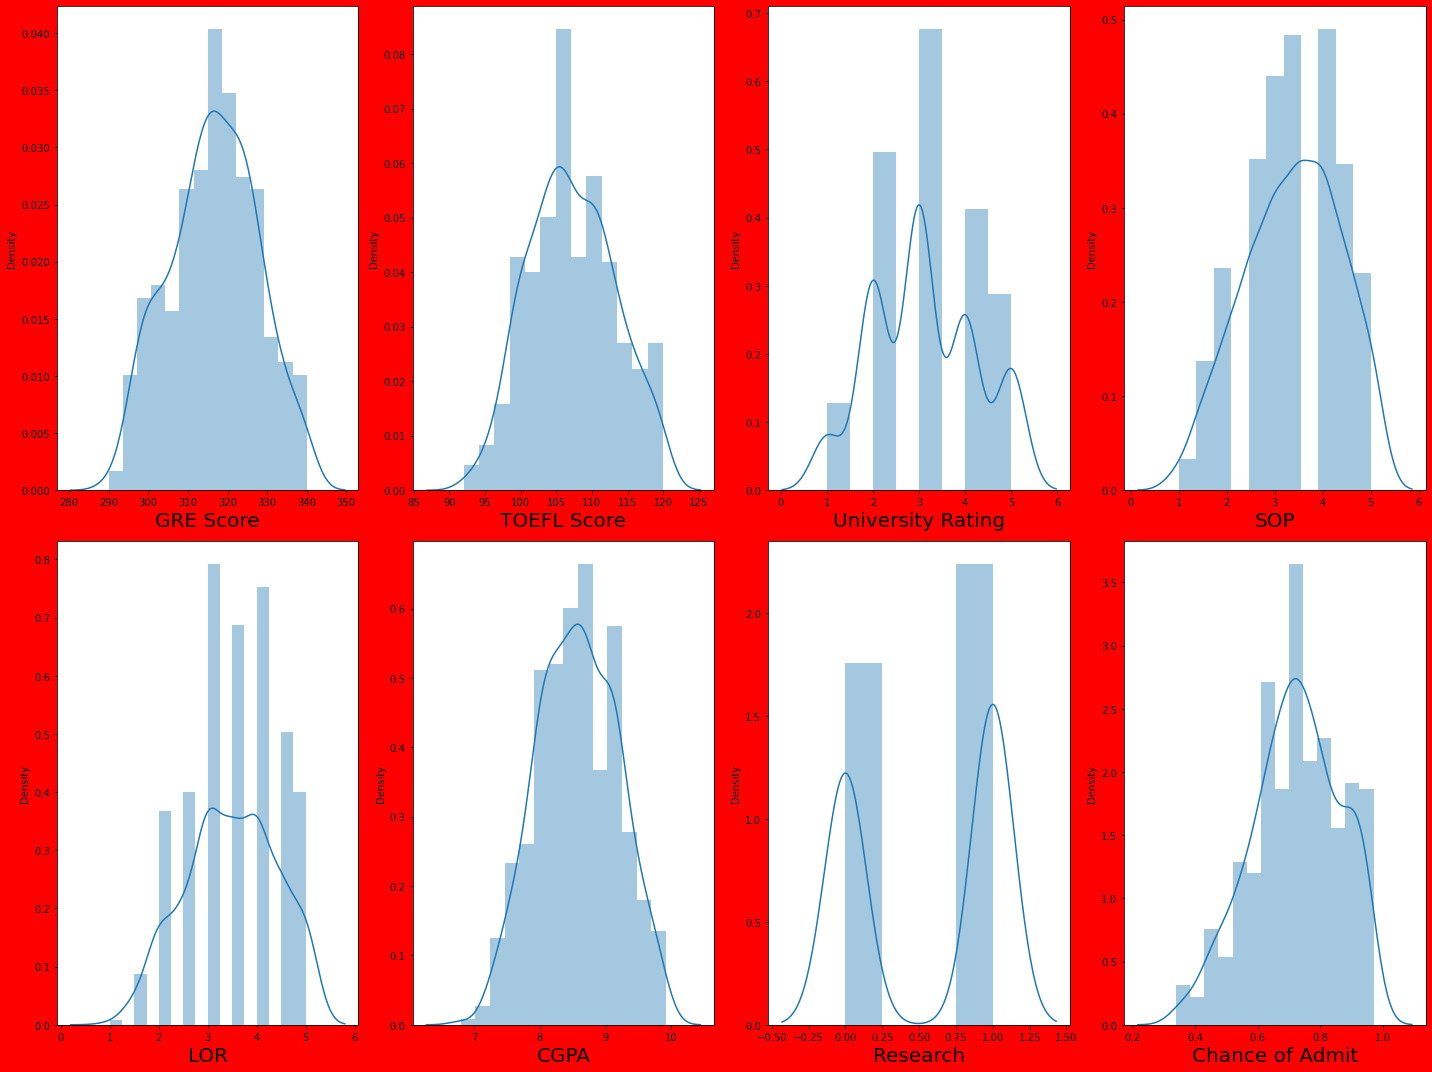

In [14]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

The data distribution looks decent enough and there doesnot sems to by any skeweness.

Great lets go ahead .Lets observe the relationship between indipendent and dependent variables.

In [15]:
#Divide dataset into Features and label
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])

In [16]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

in y we only taken the chance of admit (its a predict value,and its a dependent variable)

In [17]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


in x we have delete the chance of admit. we can see rest of the coloumn and rowws.(x is indepenent varaiable , features)

In [ ]:
#First we need to sepatrate features and labels so in y am 
# keeping label and in x  i am dropping Chance of Admit

In [ ]:
#Visualizing  relationship

In [ ]:
# this is numerical data set dats why we are using scatter plot


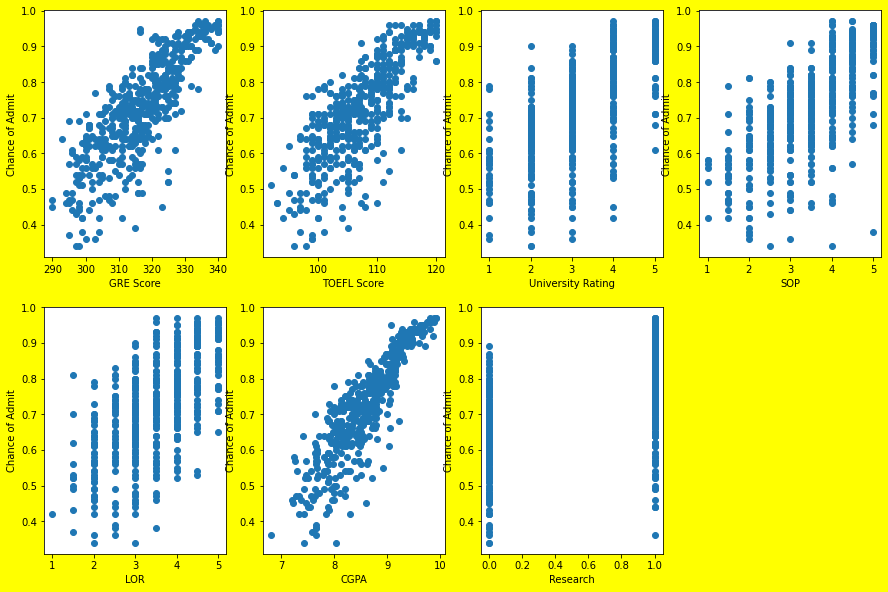

In [18]:
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber +=1
plt.show()

In [ ]:
#We have check only there is relationship or not  , dont worry about t

In [ ]:
# Great , The relationship between the dependent variable and independent varible look fairly linear
# Thus , our linearly assumption is satisfied.

In [ ]:
#data scaling formula

In [ ]:
#z-distribution
z=(x-mean)/std

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [20]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

lets Go ahead and use linear regression and see how good fit oor data.But first lets split our data in train and test


# Split data into train and test Model will be built on Training data and tested on test data

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

In [ ]:
#Formula is = x_train,x_test,y_train,y_test = train_test_split(standard_scaler,labels,test_size,random_state)

# Model instanting and training

In [22]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
#predict the chance of admission give feature
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [ ]:
#since we have already fit the scaler you can transfer the data

In [24]:
print("Chance of Admission is: ",regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is:  [0.82445851]


When we are learning ,our model was learning , How did it learns it learned on scaled data. So basically we converts out data to scaled data . when we have to scale the data . we only use scaler.transform.

# You can save the model and later you can use it for prediction

In [25]:
pickle.dump(regression,open('Ruzaina_file','wb')) 

In [ ]:
#they Save in bit wise


# How to open Model

In [26]:
import pickle
lin_model=pickle.load(open('Ruzaina_file','rb'))

In [27]:
lin_model

LinearRegression()

In [28]:
#Prediction using the saved model
loaded_model=pickle.load(open('Ruzaina_file','rb'))
a=loaded_model.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))
a                                    

array([0.82445851])

In [29]:
#Lets try in new window with only pickle model

scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])

array([[ 0.94125895,  0.96145116,  0.78200955,  1.13735981,  1.09894429,
         0.76721964, -1.12815215]])

# Now its time to check how good in our model

In [30]:
#Adjusted R2
regression.score(x_train,y_train)

0.82855357382842

In [31]:
#Training Score
#so that is how i am going to check how good my model understood the training data

In [32]:
regression.score(x_test,y_test)

0.7928310580010802

# Lets Plot and Visualize

Now i wanted to test it , Now i am going to pass only x_test to regression model and it is going to predict.

and i also have actual label

then i will compare predicted data to actual data .

Whatever the result am going to get its my model Confidence / How well my model will perform.




In [33]:
pred=regression.predict(x_test)

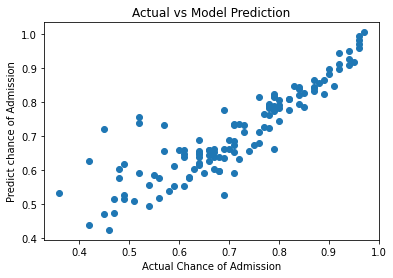

In [35]:
plt.scatter(y_test,pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

# Model Evaluation --> Is also a Metric

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
pred=regression.predict(x_test)

In [38]:
#MAE
mean_squared_error(y_test,pred)

0.0043091723323515985

In [39]:
#MSE
mean_squared_error(y_test,pred)

0.0043091723323515985

In [41]:
#MSE
mean_squared_error(y_test,pred)

0.0043091723323515985

In [42]:
#RMSE
np.sqrt(mean_squared_error(y_test,pred))

0.06564428636485889

In [ ]:
#Plot a Grampg of Residuals

<AxesSubplot:xlabel='Chance of Admit', ylabel='Density'>

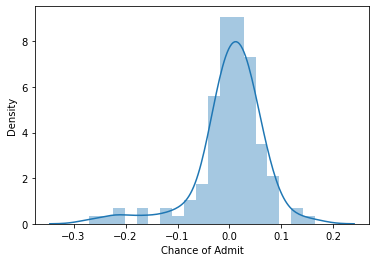

In [43]:
sns.distplot((y_test-pred))

In [44]:
print(regression.coef_)

[ 0.02734396  0.01464302  0.00630921 -0.00191607  0.01621944  0.07160816
  0.01099053]


In [45]:
pd.DataFrame(regression.coef_,x.columns,columns=['Coefficient'])

,Coefficient
GRE Score,0.027344
TOEFL Score,0.014643
University Rating,0.006309
SOP,-0.001916
LOR,0.016219
CGPA,0.071608
Research,0.010991


# You Have Sucessfully Completed Building Linear Regression Model